In [2]:
## Import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime as dt

In [22]:
from explore_funcs import *
from model_eval_funcs import *

In [3]:
rvw_df = pd.read_csv('Data/rvw_data.csv')
rvw_df.head()

,app_name,review,rating,date,gp_rvw,as_rvw,as_id,gp_id,num_sents,word_tokens,num_tokens,stopped_tokens,num_stopped_tokens
0,Aura,Awesome,5,2021-03-22 05:59:22,1,0,1114223104,com.aurahealth,1,[Awesome],1,[Awesome],1
1,Aura,Great to help u sleep,5,2021-03-21 20:29:44,1,0,1114223104,com.aurahealth,1,"[Great, to, help, u, sleep]",5,"[Great, help, sleep]",3
2,Aura,"Very calming, love it!",5,2021-03-21 09:17:13,1,0,1114223104,com.aurahealth,1,"[Very, calming, love, it]",4,"[Very, calming, love]",3
3,Aura,I was able to sleep like a baby on the first u...,5,2021-03-21 09:09:57,1,0,1114223104,com.aurahealth,3,"[I, was, able, to, sleep, like, a, baby, on, t...",21,"[able, sleep, like, baby, first, use, love, me...",12
4,Aura,"Improvement in thoughts, feelings and life!",5,2021-03-20 16:28:42,1,0,1114223104,com.aurahealth,1,"[Improvement, in, thoughts, feelings, and, life]",6,"[Improvement, thoughts, feelings, life]",4


In [4]:
rvw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169037 entries, 0 to 169036
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   app_name            169037 non-null  object
 1   review              169037 non-null  object
 2   rating              169037 non-null  int64 
 3   date                169037 non-null  object
 4   gp_rvw              169037 non-null  int64 
 5   as_rvw              169037 non-null  int64 
 6   as_id               169037 non-null  int64 
 7   gp_id               163327 non-null  object
 8   num_sents           169037 non-null  int64 
 9   word_tokens         169037 non-null  object
 10  num_tokens          169037 non-null  int64 
 11  stopped_tokens      169037 non-null  object
 12  num_stopped_tokens  169037 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 16.8+ MB


In [ ]:
## Map ratings to categories (pos, neg, and neut)
rating_map = {1:'neg',
              2:'neg',
              3:'neut',
              4:'pos',
              5:'pos'}

rvw_df['rating_cat'] = rvw_df['rating'].map(rating_map)
rvw_df.head()

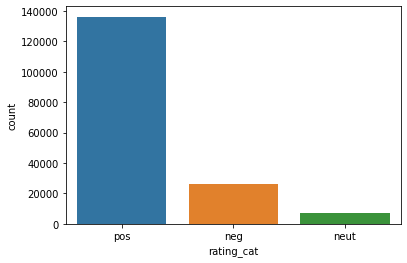

In [8]:
sns.countplot(data=rvw_df, x='rating_cat');

In [10]:
check_unique('rating_cat', rvw_df)

,count,%
pos,136147,80.540000
neg,25904,15.320000
neut,6986,4.130000


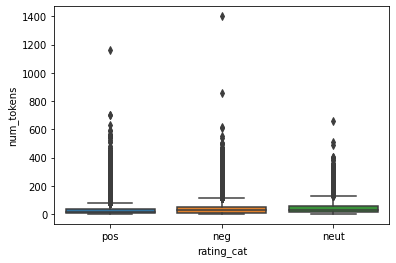

In [14]:
sns.boxplot(x='rating_cat', y='num_tokens', data=rvw_df);

In [15]:
bin_df = rvw_df.loc[rvw_df['rating_cat']!='neut'].copy()
check_unique('rating_cat', bin_df)

,count,%
pos,136147,84.010000
neg,25904,15.990000


## Default Binary Target Models

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

X = bin_df['review']
y = bin_df['rating_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=731)

In [17]:
# Naïve Bayes:
clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                   ('clf', MultinomialNB()),
])

# Linear SVC:
clf_svc = Pipeline([('tfidf', TfidfVectorizer()),
                    ('clf', LinearSVC()),
])

-------------------------------------------------------
Classification Report: Default MNB
-------------------------------------------------------
              precision    recall  f1-score   support

         neg       0.93      0.51      0.66      5084
         pos       0.92      0.99      0.95     27327

    accuracy                           0.92     32411
   macro avg       0.92      0.75      0.81     32411
weighted avg       0.92      0.92      0.91     32411

-------------------------------------------------------
-------------------------------------------------------




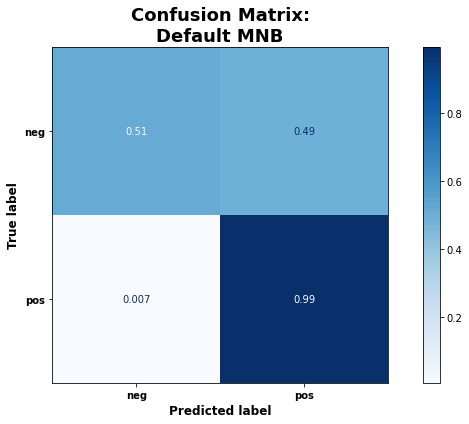

In [25]:
clf_nb.fit(X_train, y_train)
eval_classifier(clf_nb, X_test, y_test, 'Default MNB');

-------------------------------------------------------
Classification Report: Default Linear SVC
-------------------------------------------------------
              precision    recall  f1-score   support

         neg       0.88      0.82      0.85      5084
         pos       0.97      0.98      0.97     27327

    accuracy                           0.95     32411
   macro avg       0.92      0.90      0.91     32411
weighted avg       0.95      0.95      0.95     32411

-------------------------------------------------------
-------------------------------------------------------




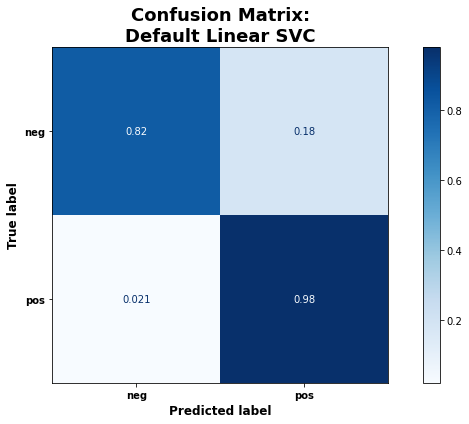

In [26]:
clf_svc.fit(X_train, y_train)
eval_classifier(clf_svc, X_test, y_test, 'Default Linear SVC');

In [111]:
import spacy

# Define custom stopwords list
custom_stopwords = ['a', 'about', 'am', 'an', 'and', 'are', 'as', 'at', 'be', 'been', 'but', 'by', 'can',
             'even', 'ever', 'for', 'from', 'get', 'had', 'has', 'have', 'he', 'her', 'hers', 'his',
             'how', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'just', 'me', 'my', 'of', 'on', 'or',
             'our', 'see', 'seen', 'she', 'so', 'than', 'that', 'the', 'their', 'there', 'they', 'this',
             'to', 'us', 'was', 'we', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'you', 'u',
             'ca', "'d", "'ll", "'m", "n‘t", "'re", "'s", "'ve"
            ]

# Override the stop words set for the language
cls = spacy.util.get_lang_class('en')
cls.Defaults.stop_words = custom_stopwords

# Now load model
nlp = spacy.load('en_core_web_sm')

In [112]:
rvw_df['review_doc'] = rvw_df['review'].apply(nlp)
rvw_df.head()

,app_name,review,rating,date,gp_rvw,as_rvw,as_id,gp_id,review_doc,num_sents,word_tokens,num_tokens,stopped_tokens,num_stopped_tokens
0,Aura,Awesome,5,2021-03-22 05:59:22,1,0,1114223104,com.aurahealth,(Awesome),1,[Awesome],1,[Awesome],1
1,Aura,Great to help u sleep,5,2021-03-21 20:29:44,1,0,1114223104,com.aurahealth,"(Great, to, help, u, sleep)",1,"[Great, to, help, u, sleep]",5,"[Great, help, u, sleep]",4
2,Aura,"Very calming, love it!",5,2021-03-21 09:17:13,1,0,1114223104,com.aurahealth,"(Very, calming, ,, love, it, !)",1,"[Very, calming, love, it]",4,"[calming, love]",2
3,Aura,I was able to sleep like a baby on the first u...,5,2021-03-21 09:09:57,1,0,1114223104,com.aurahealth,"(I, was, able, to, sleep, like, a, baby, on, t...",3,"[I, was, able, to, sleep, like, a, baby, on, t...",21,"[able, sleep, like, baby, use, love, meditatio...",11
4,Aura,"Improvement in thoughts, feelings and life!",5,2021-03-20 16:28:42,1,0,1114223104,com.aurahealth,"(Improvement, in, thoughts, ,, feelings, and, ...",1,"[Improvement, in, thoughts, feelings, and, life]",6,"[Improvement, thoughts, feelings, life]",4
